# Exploratory Data Analysis (EDA) on a Home Loan dataset

This project conduct an in-depth Exploratory Data Analysis (EDA) on a Home Loan dataset. The objective is to understand the underlying structure, trends, and relationships in the data through data cleaning, visualization, and statistical analysis. This initial investigation is essential for uncovering patterns that may influence loan approvals and risk assessment. 
Financial institutions rely on historical loan data to assess creditworthiness and refine their lending practices. The Home Loan dataset contains key information on applicants, such as income, employment status, credit history, and property details, along with the corresponding loan outcomes.

## Phase 1: Data Collection and Preparation

### Task 1.1: Load the Home Loan dataset into a Pandas DataFrame

In [1]:
# importing library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stat 

# set display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)



In [2]:
# loading data
# path to the train data
train_dt_path= "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"

# path to the test data
test_dt_path = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_test.csv"

# load the train data
train_data = pd.read_csv(train_dt_path)

# load the test data
test_data = pd.read_csv(test_dt_path)

In [3]:
# view train data head
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# view test data head
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
# snap shot of the train data
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# checking the data snapshot
train_data.shape

(614, 13)

In [7]:
# checking the data snapshot
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Task 1.2: Inspect the dataset for missing values, duplicates, and data type inconsistencies.

In [8]:
# checking the missig data
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# checking the duplicate data
train_data.duplicated().sum()

0

In [10]:
# Checking data type inconsistencies
print(train_data.dtypes)
train_data.head(10)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


### Task 1.3: Clean the dataset by handling missing values, correcting data types, and addressing outliers.

**The column with null values**
-   Gender              13
-   Married             3
-   Dependents          15
-   Self_Employed       32
-   LoanAmount          22
-   Loan_Amount_Term    14
-   Credit_History      50

**No duplicate data**

**What to correct for data type inconsistencies:**
-   Dependents to int8 but first change 3+ to 3
-   ApplicationIncome to float64
-   loan_amount_term to int16
-   Credit_History to int8




#### Handling missing values

In [11]:
# let start with most important field from this missing

# Based on assumption that, if loanAmount is not specified, 
# it means it is not a valid loan record.

# count missing values
no_of_record=train_data["LoanAmount"].isnull().sum()

# drop rows where loan amount is missing
train_data.dropna(subset=["LoanAmount"], inplace=True)
print(f"{no_of_record} records were removed, because loanAmount is not specified")

22 records were removed, because loanAmount is not specified


In [12]:
# let check the list of missing data again
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               2
Dependents           13
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
# Based on assumption that, if loan_Amount_term is not specified, 
# it means it is not a valid loan record.

# count missing values
no_of_record = train_data["Loan_Amount_Term"].isnull().sum()

# drop rows where loan amount term is missing
train_data.dropna(subset=["Loan_Amount_Term"], inplace=True)

print(f"{no_of_record} records were removed because Loan_Amount_Term was missing")


14 records were removed because Loan_Amount_Term was missing


In [14]:
# let check the list of missing data again
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               2
Dependents           12
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
# Based on the data description that
# Credit history of the applicant has 1 for good and 0 for bad or missing).
# Therefore let fill the missing with zero

# count missing values
no_of_record = train_data["Credit_History"].isnull().sum()

# drop rows where loan amount term is missing
train_data["Credit_History"]=train_data["Credit_History"].fillna(0)

print(f"{no_of_record} missing Credit_History values were replaced with 0")


49 missing Credit_History values were replaced with 0


In [16]:
# We have Only 2 missing for married data
# let fill it with the most frequent marital status to avoid losing data.

# count missing values
no_of_record = train_data["Married"].isnull().sum()

train_data["Married"]= train_data["Married"].fillna(train_data["Married"].mode()[0])
print(f"{no_of_record} missing Marital status values were replaced with the most common (mode)")

2 missing Marital status values were replaced with the most common (mode)


In [17]:
# Missing gender is usually due to data entry errors, not meaningful absence. 
# If we fill it with the most common gender it will preserves dataset balance.0
0
# count missing values0
no_of_record = train_data["Gender"].isnull().sum()

train_data["Gender"]= train_data["Gender"].fillna(train_data["Gender"].mode()[0])
print(f"{no_of_record} missing Gender values were replaced with the most common(mode)")


13 missing Gender values were replaced with the most common(mode)


In [18]:
# Let fill the self_employed with the most common data.

# count missing values
no_of_record = train_data["Self_Employed"].isnull().sum()

train_data["Self_Employed"]= train_data["Self_Employed"].fillna(train_data["Self_Employed"].mode()[0])
print(f"{no_of_record} missing Self_Employed status values were replaced with the most common (mode)")


30 missing Self_Employed status values were replaced with the most common (mode)


In [19]:
# Let fill the dependents with the most common data.

# count missing values
no_of_record = train_data["Dependents"].isnull().sum()

train_data["Dependents"]= train_data["Dependents"].fillna(train_data["Dependents"].mode()[0])
print(f"{no_of_record} missing Dependents values were replaced with the most common (mode)")


12 missing Dependents values were replaced with the most common (mode)


In [20]:
# let check the list of missing data again
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Correcting data types

In [21]:
# What to correct for data type inconsistencies:
# -   Dependents to int8 but first change 3+ to 3
# -   ApplicationIncome to float64
# -   loan_amount_term to int16
# -   Credit_History to int8

# let convert 3+ to 3 first
train_data["Dependents"]= train_data["Dependents"].replace("3+", 3)

# changing the data types
train_data= train_data.astype({
    "Dependents": "int8",
    "ApplicantIncome": "float64",
    "Loan_Amount_Term" : "int16",
    "Credit_History" : "int8"
})

# let verify the changes
print(train_data.dtypes)
train_data.head(10)

Loan_ID               object
Gender                object
Married               object
Dependents              int8
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int16
Credit_History          int8
Property_Area         object
Loan_Status           object
dtype: object


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360,1,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360,1,Urban,Y
7,LP001014,Male,Yes,3,Graduate,No,3036.0,2504.0,158.0,360,0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006.0,1526.0,168.0,360,1,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841.0,10968.0,349.0,360,1,Semiurban,N
10,LP001024,Male,Yes,2,Graduate,No,3200.0,700.0,70.0,360,1,Urban,Y


#### Addressing outliers

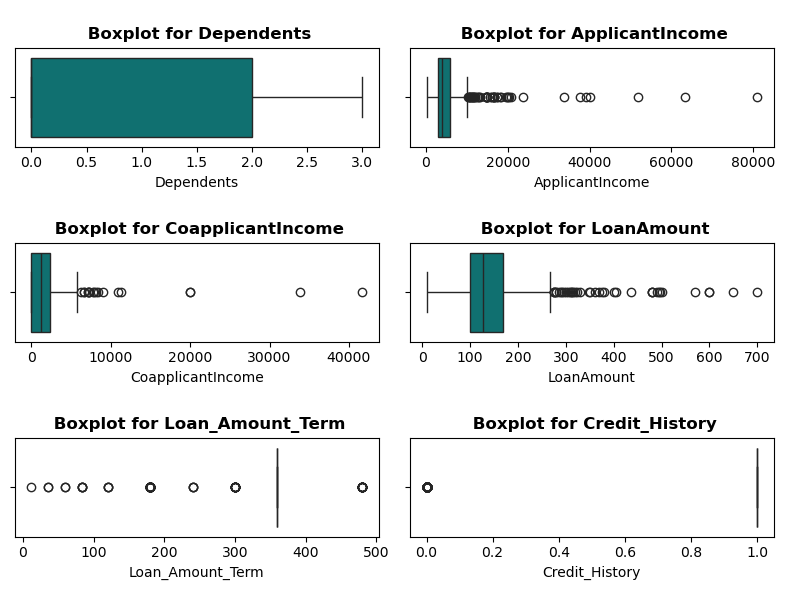

In [22]:
# let check for the outliers using box plot for all the numerical data
numerical_cols= ["Dependents","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]
plt.figure(figsize=(8,6))

# plotting for each features in subplot (grid)
for i, col in enumerate(numerical_cols, start=1):
    plt.subplot(3,2,i)
    sns.boxplot(x=train_data[col], color='teal')
    plt.title(f"\n Boxplot for {col}", fontweight="bold")
plt.tight_layout()
plt.show()

## Phase 2: Exploratory Data Analysis (EDA)

### Task 2.1: Conduct descriptive statistics to summarize the key characteristics of the data.

In [23]:
# Let get basic info about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            578 non-null    object 
 1   Gender             578 non-null    object 
 2   Married            578 non-null    object 
 3   Dependents         578 non-null    int8   
 4   Education          578 non-null    object 
 5   Self_Employed      578 non-null    object 
 6   ApplicantIncome    578 non-null    float64
 7   CoapplicantIncome  578 non-null    float64
 8   LoanAmount         578 non-null    float64
 9   Loan_Amount_Term   578 non-null    int16  
 10  Credit_History     578 non-null    int8   
 11  Property_Area      578 non-null    object 
 12  Loan_Status        578 non-null    object 
dtypes: float64(3), int16(1), int8(2), object(7)
memory usage: 51.9+ KB


From the infomation above we can see that our data doesn't have any missing value again and all the data type are correct and we are able to use lesser memory.

In [24]:
# let do summary of statistics for numeric columns
train_data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Dependents,578.0,0.76,1.01,0.0,0.00,0.0,2.0,3.0
ApplicantIncome,578.0,5435.14,6229.38,150.0,2890.25,3812.5,5795.0,81000.0
CoapplicantIncome,578.0,1640.48,2993.27,0.0,0.00,1211.5,2281.0,41667.0
LoanAmount,578.0,147.14,86.34,9.0,100.00,128.0,168.0,700.0
Loan_Amount_Term,578.0,342.15,65.44,12.0,360.00,360.0,360.0,480.0
Credit_History,578.0,0.78,0.42,0.0,1.00,1.0,1.0,1.0


From the above summary of statistics, we can deduce that:
We have 578 loan records with 6 numerical columns (variables)

| **Variable**          | **Interpretation**                              |
| --------------------- | ----------------------------------------------- |
| **Dependents**        | On average, applicants have fewer than one dependent (mean $\approx$ 0.76). Most have between 0 and 2 dependents. |
| **ApplicantIncome**   | The average applicant income is ₦5,435, ranging from ₦150 to ₦81,000. This indicates a strong income disparity among applicants, suggesting possible outliers.|
| **CoapplicantIncome** | The mean coapplicant income is approximately ₦1,640. However, both the median and 25th percentile are ₦0, confirming that at least half of the applicants have no coapplicant income. The wide range (₦0 – ₦41,667) shows significant variation among those with coapplicants, suggesting potential outliers. |
| **LoanAmount**        | The average loan amount requested is about ₦147,000. Around 75% of applicants requested less than ₦170,000, while the maximum reached ₦700,000. This wide range indicates substantial variation in loan requests and possible outliers. |
| **Loan_Amount_Term**  | About 75% of applications are for long-term loans of 30 years (360 months). The minimum term is 1 year (12 months), and the maximum is 40 years (480 months), showing a consistent preference for long-term loan packages. |
| **Credit_History**    | The mean value of 0.78 indicates that approximately 78% of applicants have a good credit history. |

In [25]:
# # let do summary of statistics for non-numeric (categorical) columns 
train_data.describe(include=['object']).T


,count,unique,top,freq
Loan_ID,578,578,LP001003,1
Gender,578,2,Male,472
Married,578,2,Yes,377
Education,578,2,Graduate,457
Self_Employed,578,2,No,501
Property_Area,578,3,Semiurban,225
Loan_Status,578,2,Y,403


In [26]:
# let check their value distribution
categorical_cols=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
# printing the value count for each variable
for col in categorical_cols:
    print(train_data[col].value_counts())
    print("---------------------------------------")

Gender
Male      472
Female    106
Name: count, dtype: int64
---------------------------------------
Married
Yes    377
No     201
Name: count, dtype: int64
---------------------------------------
Education
Graduate        457
Not Graduate    121
Name: count, dtype: int64
---------------------------------------
Self_Employed
No     501
Yes     77
Name: count, dtype: int64
---------------------------------------
Property_Area
Semiurban    225
Urban        184
Rural        169
Name: count, dtype: int64
---------------------------------------
Loan_Status
Y    403
N    175
Name: count, dtype: int64
---------------------------------------


From the summary above, the dataset contains one unique identifier (Loan_ID) and six categorical variables.

| **Variable**      | **Interpretation**                                |
| ----------------- | ------------------------------------------------- |
| **Gender**        | The majority of applicants are male (472 out of 578 records). |
| **Married**       | Most applicants are married (377 out of 578 records). |
| **Education**     | A large proportion of applicants are graduates (457 out of 578 records). |
| **Self_Employed** | Most applicants are not self-employed (501 out of 578), indicating that the majority are salary or wage earners. |
| **Property_Area** | Most applicants’ properties are located in semi-urban areas (225), followed by urban (184) and rural (169) areas. |
| **Loan_Status**   | Approximately 69.7% of loan applications were approved (403 out of 578). |


### Task 2.2: Visualize distributions of numerical features (e.g., applicant income, loan amount) using histograms and box plots.

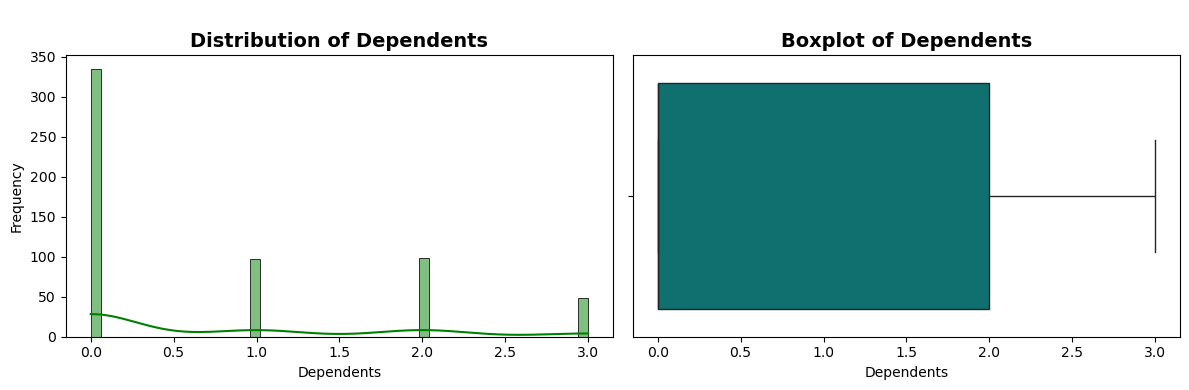

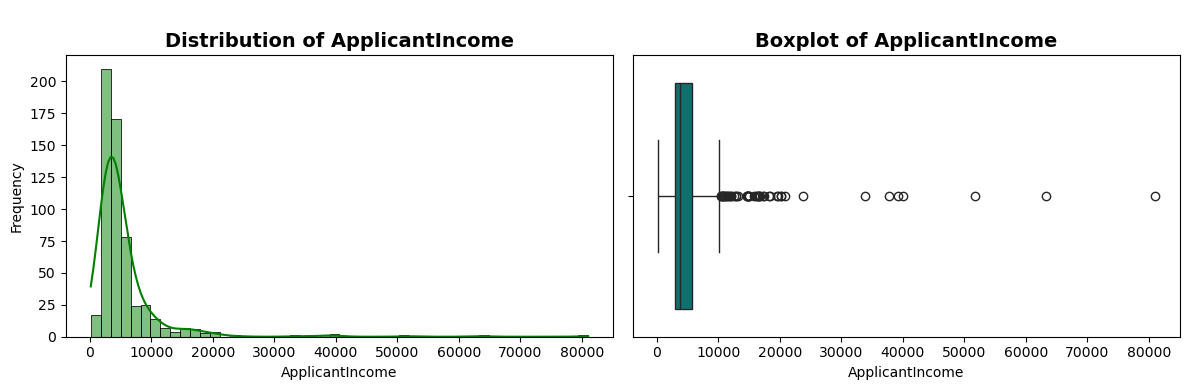

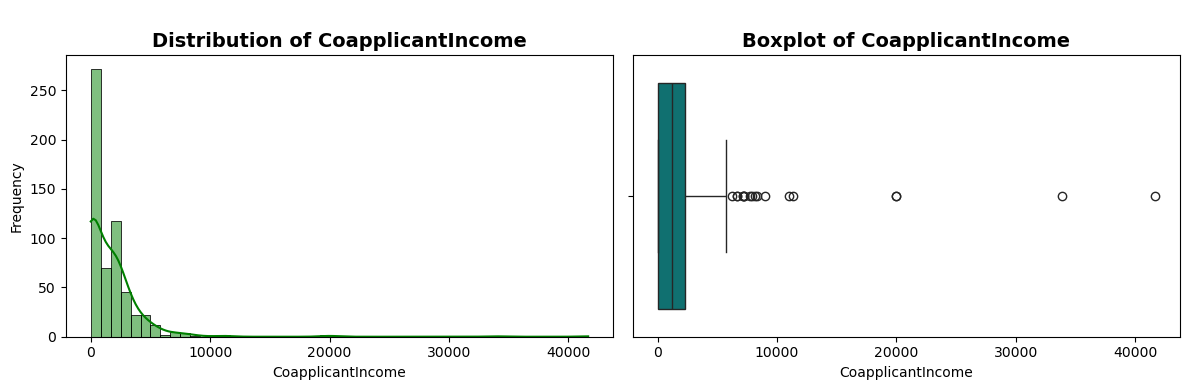

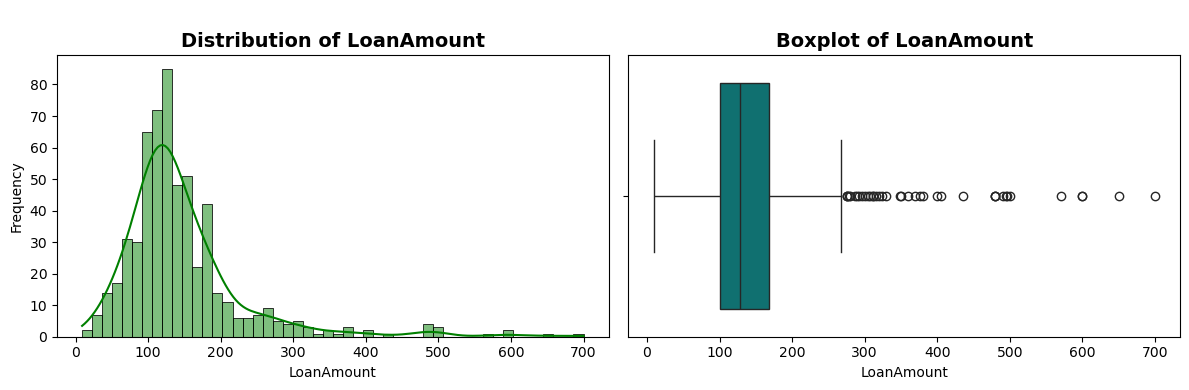

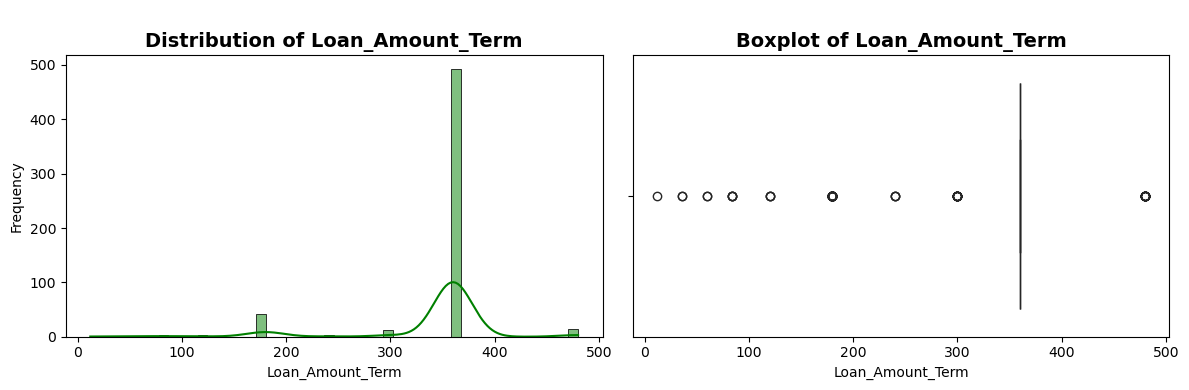

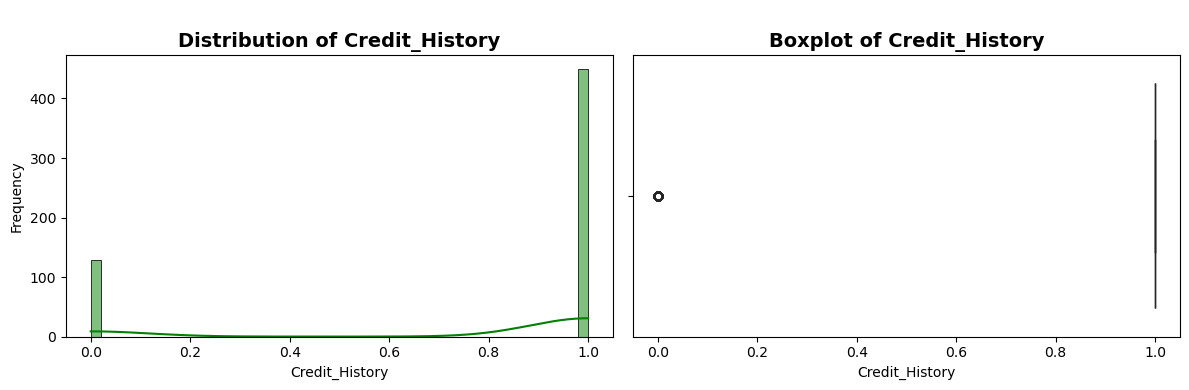

In [27]:
# let re-use the numerical_cols we defined when ploting boxplot earlier
for col in numerical_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)# first plot histogram
    sns.histplot(train_data[col], kde=True, bins=50, color='green')
    plt.title(f'\nDistribution of {col}',fontsize=14,fontweight="bold")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    plt.subplot(1,2,2)# second plot Boxplot
    sns.boxplot(x=train_data[col], color="teal")
    plt.title(f'\nBoxplot of {col}', fontsize=14, fontweight="bold")

    plt.tight_layout()
    plt.show()

### Task 2.3: Analyze categorical features (e.g., education, employment status, property area) using bar charts and pie charts.


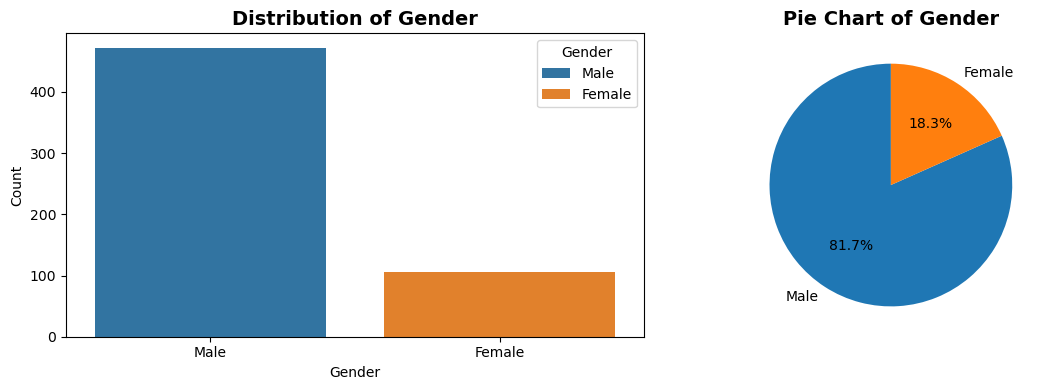

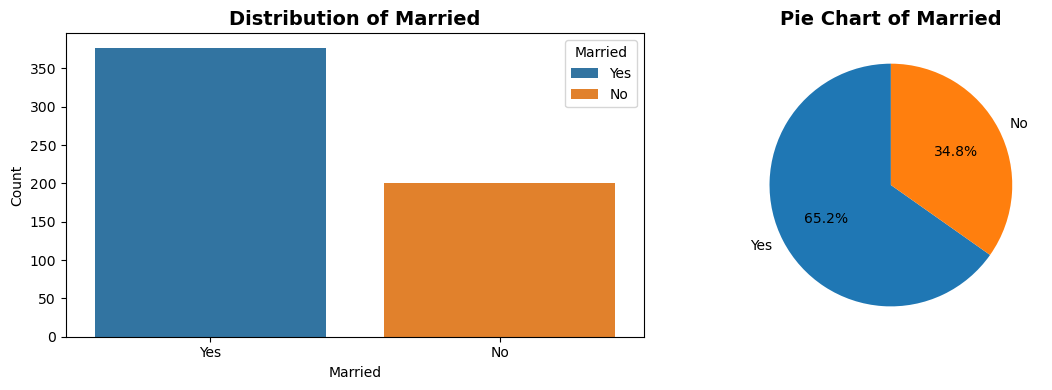

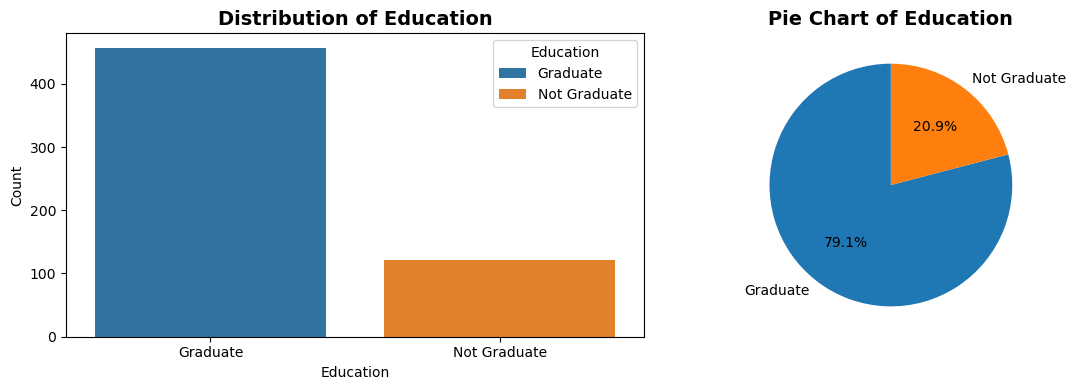

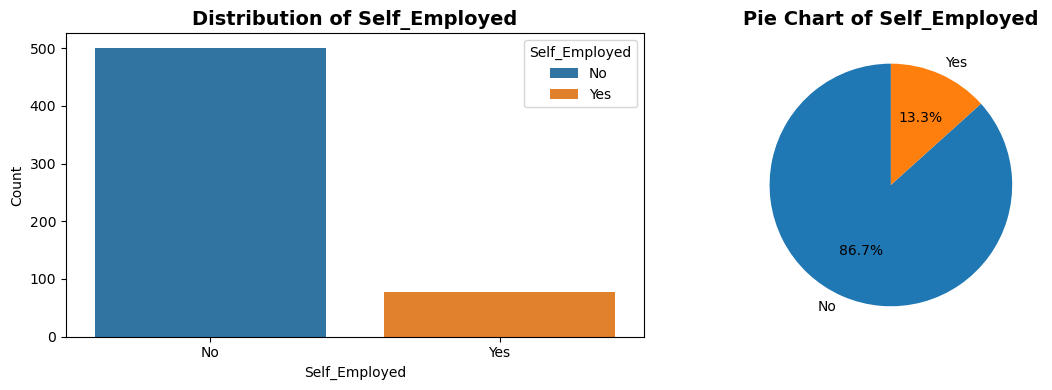

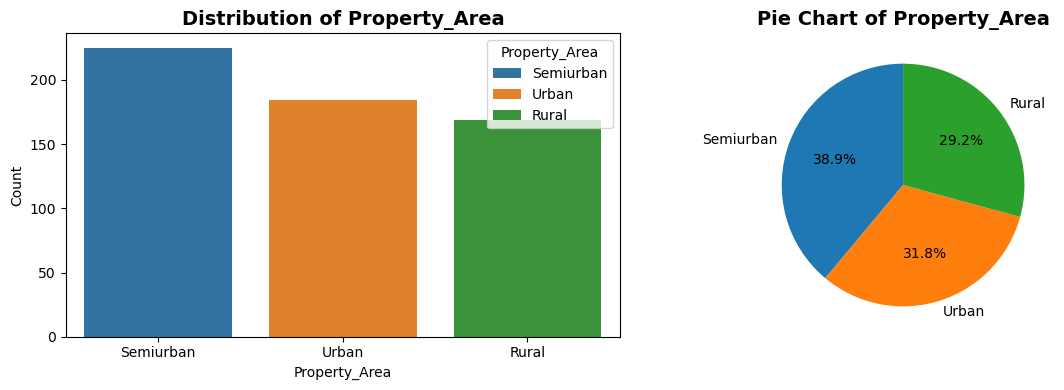

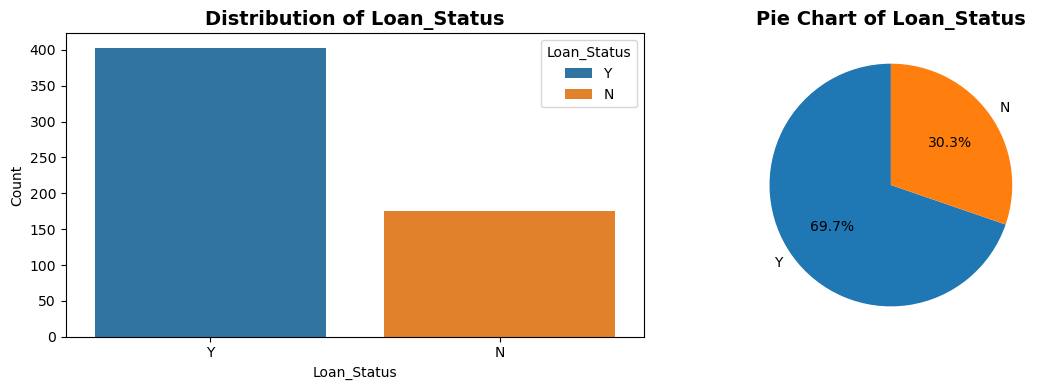

In [28]:
# let reuse our categorical_cols variable we declared earlier
for col in categorical_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1) # first plot Bar chart
    sns.barplot(
        x=train_data[col].value_counts().index,
        y=train_data[col].value_counts().values,
        hue=train_data[col].value_counts().index,
        legend=True
    )
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Count')

    
    plt.subplot(1,2,2) # Second plot Pie Chart
    train_data[col].value_counts().plot.pie(
        autopct='%1.1f%%', startangle=90, ylabel=''
    )
    plt.title(f'Pie Chart of {col}', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()


### Task 2.4: Examine relationships between features and the target variable (loan approval status) using scatter plots, correlation matrices, and cross-tabulations.



**I’ll focus on two types of variable available here:**

1.  Numeric vs numerical features – Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term and Credit_History

2.  Categorical features – Gender, Married, Education, Credit_History

will check all against our terget variable **(Loan_Status)**

#### 1. Numeric vs numerical features (using scatter plot)

In [29]:
# creating a function to plot scatter plot of two numerical 
#  and use target as hue

def checkrelationship(df, feature1, feature2, target):
    r= df[feature1].corr(df[feature2])
    color="green"
    if r<0.5:
        color="red"
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x=feature1, y=feature2, hue=target, alpha=0.6)
    sns.regplot(data=df,x=feature1,y=feature2, scatter=False, color=color)
    plt.title(f"{feature1} vs {feature2} by {target} (with trend line)\n Correlation of {r:.2f}")
    plt.show()

**Let see the relationship between all the numeric column pairwisely**
I will be looking at:
1. ApplicantIncome vs CoapplicantIncome against Loan_Status
2. ApplicantIncome Vs LoanAmount against Loan_Status
3. CoapplicantIncome vs LoanAmount against Loan_Status
4. LoanAmount vs Loan_Amount_Term against Loan_Status

**1. ApplicantIncome vs CoapplicantIncome against Loan_Status**

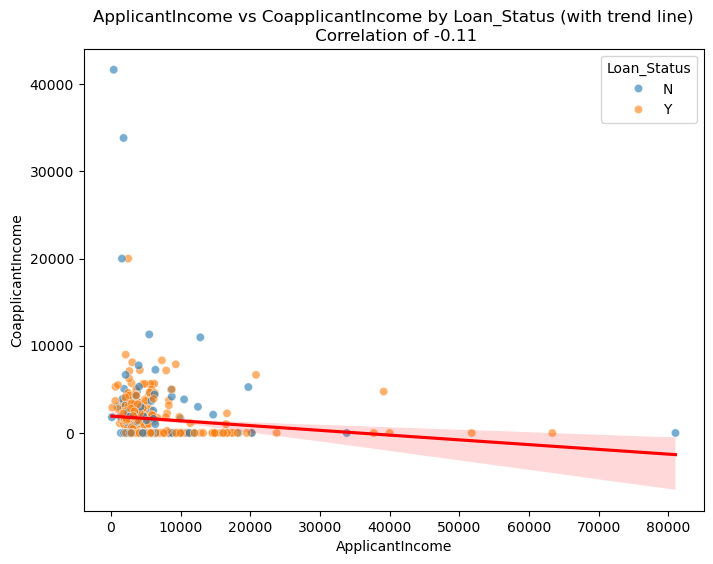

In [30]:

checkrelationship(df=train_data, feature1="ApplicantIncome",feature2="CoapplicantIncome",target="Loan_Status")

**2. ApplicantIncome Vs LoanAmount against Loan_Status**

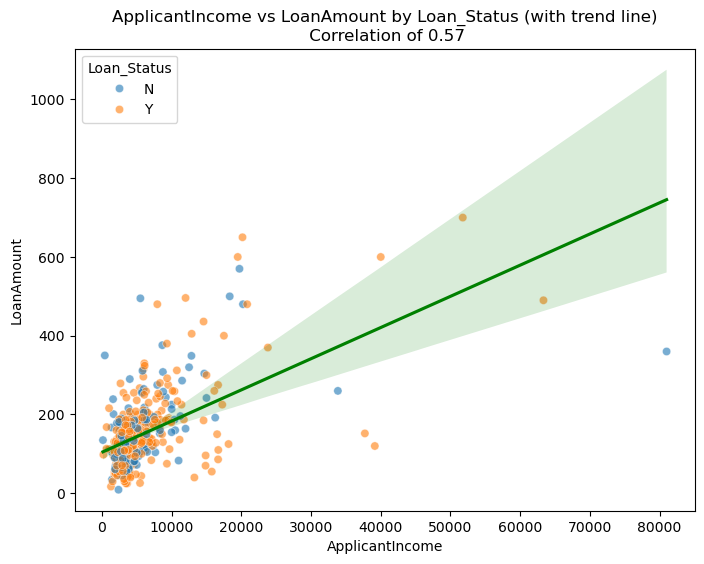

In [31]:
checkrelationship(df=train_data, feature1="ApplicantIncome",feature2="LoanAmount",target="Loan_Status")


**3. CoapplicantIncome vs LoanAmount against Loan_Status**

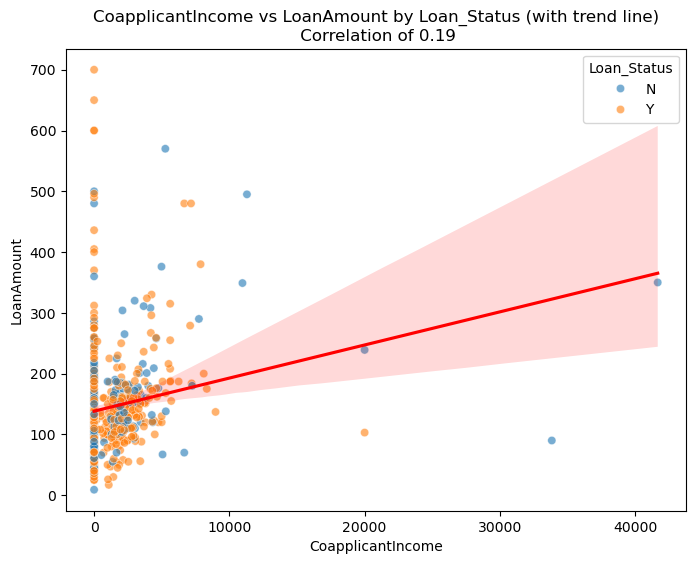

In [32]:
checkrelationship(df=train_data, feature1="CoapplicantIncome",feature2="LoanAmount",target="Loan_Status")


**4. LoanAmount vs Loan_Amount_Term against Loan_Status**


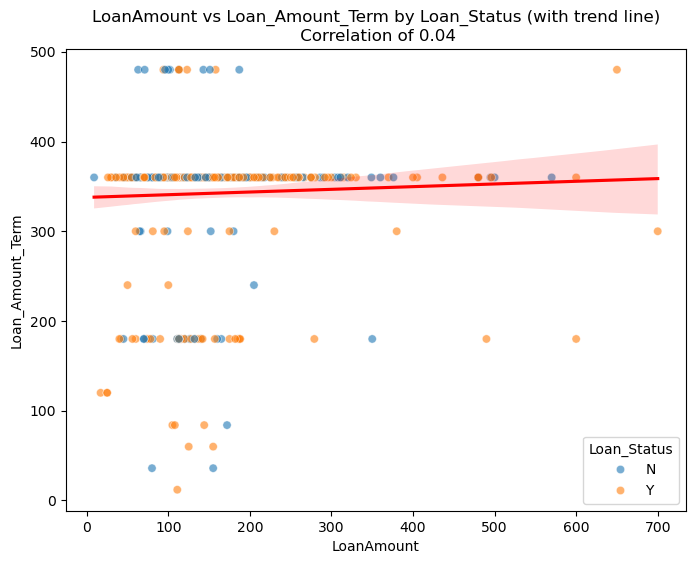

In [33]:
checkrelationship(df=train_data, feature1="LoanAmount",feature2="Loan_Amount_Term",target="Loan_Status")


**Show only moderate/strong relationships**

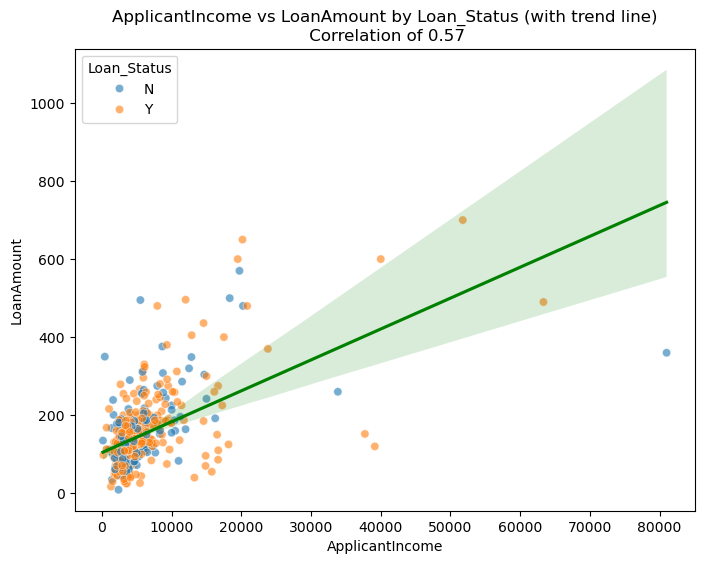

In [34]:
from itertools import combinations
for f1, f2 in combinations(numerical_cols,2):
    r = train_data[f1].corr(train_data[f2])
    if abs(r) >= 0.3:  # show only moderate/strong relationships
        checkrelationship(df=train_data, feature1=f1,feature2=f2,target="Loan_Status")

#### 2. Numerical column (Correlation)

**Let first covert our Loan_Status to binary equivalent**

In [35]:
# make a copy to show the correlation
df=train_data.copy()
df["Loan_Status_val"]= df["Loan_Status"].apply(lambda x: 1 if x=="Y" else 0)
df[["Loan_Status", "Loan_Status_val"]].head()


,Loan_Status,Loan_Status_val
1,N,0
2,Y,1
3,Y,1
4,Y,1
5,Y,1


The Correlation of all the numeric features against Loan Status


,Correlation
Dependents,0.03
ApplicantIncome,-0.01
CoapplicantIncome,-0.07
LoanAmount,-0.04
Loan_Amount_Term,-0.03
Credit_History,0.41
Loan_Status_val,1.00


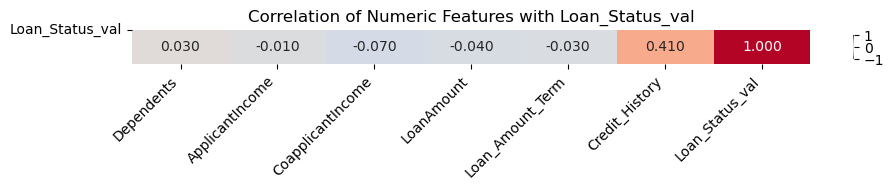

In [36]:
# now let perform the correlation
print("="* 60)
print("The Correlation of all the numeric features against Loan Status")
print("="* 60)
num_cols= df.select_dtypes(include="number")
corr= num_cols.corrwith(df['Loan_Status_val'])
df_corr= pd.DataFrame(corr.round(2), columns=["Correlation"])
display(df_corr)

# plot heat map of the correltion
plt.figure(figsize=(10,2))
sns.heatmap(df_corr.T,annot=True,fmt=".3f",cmap="coolwarm",center=0,vmin=-1,vmax=1,cbar_kws={'orientation': 'vertical', 'shrink':0.7})
plt.xticks(rotation=45, ha='right')
plt.yticks([0], ["Loan_Status_val"], rotation=0)
plt.title("Correlation of Numeric Features with Loan_Status_val", fontsize=12)
plt.tight_layout()
plt.show()


#### 3 Numeric features – ApplicantIncome, CoapplicantIncome, LoanAmount
will check all against our terget variable **(Loan_Status) using scatter plot**

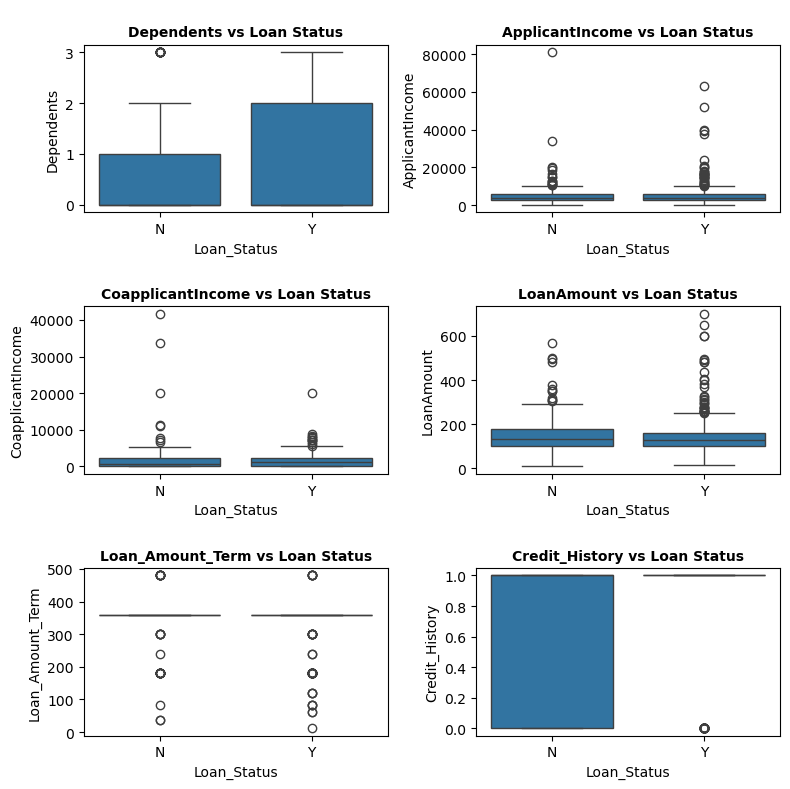

In [37]:
# ploting boxplot of all numerical variable against our target (Loan_Status)

plt.figure(figsize=(8,8))
for i, col in enumerate(numerical_cols,start=1):
    plt.subplot(3,2,i)
    sns.boxplot(x="Loan_Status", y=col, data=train_data)
    plt.title(f'\n{col} vs Loan Status', fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()


##### **Interpretations**

| Feature               | Relationship Strength | Interpretation                                                               |
| --------------------- | --------------------- | ---------------------------------------------------------------------------- |
| **Credit_History**    | **Strong**         | Applicants with a good credit history (1) are far more likely to be approved; almost all approved loans fall in this category. |
| **LoanAmount**        | **Weak**           | Slightly higher loan amounts tend to be rejected, but the overlap shows it’s not a strong factor on its own. |
| **ApplicantIncome**   | **Weak**           | Similar income distributions for both groups suggest income alone doesn’t determine approval. |
| **CoapplicantIncome** | **Weak**           | Distributions are nearly identical; coapplicant income has little influence. |
| **Loan_Amount_Term**  | **Weak**      | Most loans are 360 months; no visible difference between statuses. |
| **Dependents**        | **Weak**      | Slight median difference, but too small to have predictive power alone. |


#### 2.  Categorical features – Gender, Married, Education, Self_Employed, Property_Area
will check all against our terget variable **(Loan_Status)**


In [38]:
# let do crosstab for the categorical data
categorical_cols=['Gender','Married','Education','Self_Employed','Property_Area']
for col in categorical_cols:
    cross_tab = pd.crosstab(train_data[col], train_data['Loan_Status'], normalize='index') * 100
    print(f"{col} vs Loan_Status (%):")
    print(cross_tab)
    print("--------------------------------\n")

Gender vs Loan_Status (%):
Loan_Status          N          Y
Gender                           
Female       33.018868  66.981132
Male         29.661017  70.338983
--------------------------------

Married vs Loan_Status (%):
Loan_Status          N          Y
Married                          
No           36.318408  63.681592
Yes          27.055703  72.944297
--------------------------------

Education vs Loan_Status (%):
Loan_Status           N          Y
Education                         
Graduate      28.665208  71.334792
Not Graduate  36.363636  63.636364
--------------------------------

Self_Employed vs Loan_Status (%):
Loan_Status            N          Y
Self_Employed                      
No             29.940120  70.059880
Yes            32.467532  67.532468
--------------------------------

Property_Area vs Loan_Status (%):
Loan_Status            N          Y
Property_Area                      
Rural          37.869822  62.130178
Semiurban      23.111111  76.888889
Urban      

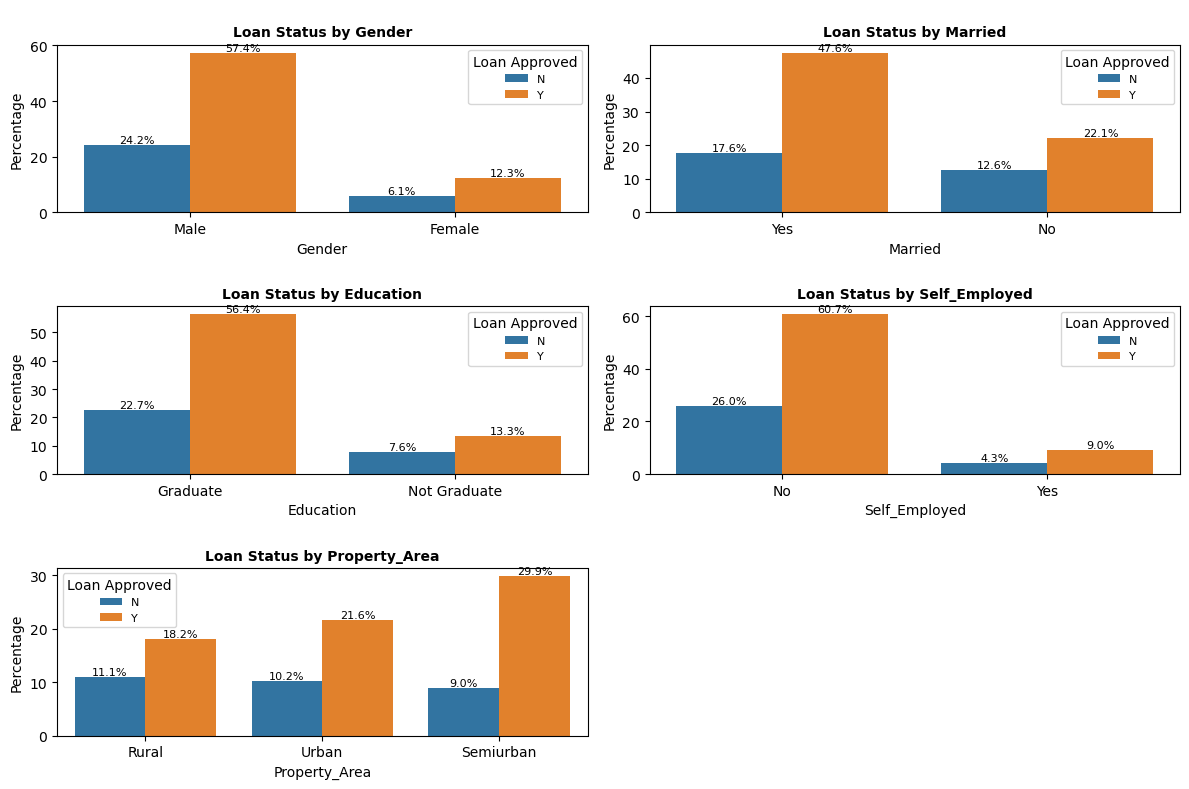

In [39]:

# #  let plot bar chart to visualize it (with percentage labelled)
plt.figure(figsize=(12,8))

for i, col in enumerate(categorical_cols, start=1):
    plt.subplot(3,2,i)
    ax = sns.countplot(data=train_data, x=col, hue='Loan_Status', stat='percent')

    # Add percentage labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=8)

    plt.title(f'\nLoan Status by {col}', fontsize=10, fontweight='bold')
    plt.ylabel('Percentage')
    plt.xlabel(col)
    plt.legend(title='Loan Approved', fontsize=8)
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()




##### **Interpretations**

| Feature               | Relationship Strength | Interpretation                                                               |
| --------------------- | --------------------- | ---------------------------------------------------------------------------- |
|Gender|

### Task 2.5: Identify trends, anomalies, and patterns that could impact loan outcomes.


## Phase 3: Reporting and Insights

### Task 3.1: Summarize key findings and insights derived from the EDA.

### Task 3.2: Create comprehensive visualizations and dashboards to communicate your insights effectively.

### Task 3.3: Document the EDA process and prepare a detailed report outlining methodology, analysis, and recommendations for further investigation.

#### Exporting the data for preprocessing

In [40]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360,1,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106.0,0.0,40.0,180,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360,1,Urban,Y


In [41]:
train_data.to_csv("EDA_data.csv", index=False)

### Baseling modelling

In [ ]:
# let do quick model on the raw data b4 preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


# split our data data
x= train_data.drop(colums=['LoanID','Loan_Status'] axis=1)
y=train_data["Loan_Status"]

# let split our data
x_train,x_test,y_train,y_test= train_test_split(x,y, stratify=y, test_size=0.2, random_state=234)